In [9]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay


In [10]:
file_path = 'almaty-apts-2019-1.csv'
df = pd.read_csv(file_path)  
df

,id,price,price_m,total_square,living_square,ratio_livtot,rooms,level,total_levels,not_ground_floor,...,concrete,part_furniture,full_furniture,year,walls,condition,price_m_k,furniture,district_name,district_code
0,1,13000000,361111,36.0,18.0,0.5000,1,3,5,1,...,0,0,0,1991,k,good,361.1,0,NBH zhetysu-1,13
1,2,14500000,402778,36.0,36.0,1.0000,1,1,9,0,...,1,1,1,2004,m,good,402.8,2,NBH zhetysu-1,13
2,3,39000000,386139,101.0,60.0,0.5941,3,11,14,1,...,1,1,0,2005,m,high,386.1,1,NBH zhetysu-3,15
3,4,16000000,380952,42.0,20.0,0.4800,1,7,9,1,...,0,1,1,1995,p,good,381.0,2,NBH zhetysu-2,14
4,5,12300000,323684,38.0,36.0,0.9500,1,1,5,0,...,0,0,0,1991,k,good,323.7,0,NBH zhetysu-1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,2351,38000000,535211,71.0,58.0,0.8200,3,1,5,0,...,0,1,1,1983,k,good,535.2,2,NBH koktem-3,58
2351,2352,19800000,440000,45.0,30.0,0.6700,2,1,12,0,...,1,1,0,2016,m,high,440.0,1,NBH koktem-3,58
2352,2353,34000000,441558,77.0,47.0,0.6100,3,1,4,0,...,0,1,0,1971,p,high,441.6,1,NBH koktem-3,58
2353,2354,24500000,376923,65.0,42.0,0.6500,3,2,5,1,...,0,1,0,1978,p,good,376.9,1,NBH koktem-3,58


In [18]:
# Информация о данных
data_info = pd.DataFrame({
    "Колонка": df.columns,
    "Тип данных": df.dtypes.values,
    "Пропуски": df.isnull().sum().values,
    "Уникальные значения": df.nunique().values
})

data_info

# Описание числовых данных
data_description = df.describe().transpose()
data_description

# Таблица с количеством дубликатов
duplicates_table = pd.DataFrame({
    "Количество дубликатов": [df.duplicated().sum()]
})

duplicates_table

# Таблица с пропусками
missing_data = pd.DataFrame({
    "Колонка": df.columns,
    "Пропуски": df.isnull().sum().values,
    "Процент пропусков": (df.isnull().mean() * 100).values
}).sort_values(by="Процент пропусков", ascending=False)

missing_data


,Колонка,Пропуски,Процент пропусков
0,price,0,0.0
21,panel,0,0.0
23,concrete,0,0.0
24,part_furniture,0,0.0
25,full_furniture,0,0.0
26,year,0,0.0
27,price_m_k,0,0.0
28,district_code,0,0.0
29,walls_b,0,0.0
30,walls_k,0,0.0


In [12]:
# Удаление дубликатов
df = df.drop_duplicates()

# Обработка пропусков (заполнение медианой для числовых значений)
df = df.fillna(df.median(numeric_only=True))

# Удаление неинформативных признаков
non_informative_columns = ['id', 'district_name']  # Добавьте или измените по необходимости
df = df.drop(columns=non_informative_columns)

# Кодировка категориальных признаков
categorical_columns = ['walls', 'condition', 'furniture']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Проверка обработанного набора данных
df.head()


,price,price_m,total_square,living_square,ratio_livtot,rooms,level,total_levels,not_ground_floor,not_last_floor,...,walls_m,walls_p,condition_bad,condition_good,condition_high,condition_old,condition_prefin,condition_rough,furniture_1,furniture_2
0,13000000,361111,36.0,18.0,0.5000,1,3,5,1,1,...,False,False,False,True,False,False,False,False,False,False
1,14500000,402778,36.0,36.0,1.0000,1,1,9,0,1,...,True,False,False,True,False,False,False,False,False,True
2,39000000,386139,101.0,60.0,0.5941,3,11,14,1,1,...,True,False,False,False,True,False,False,False,True,False
3,16000000,380952,42.0,20.0,0.4800,1,7,9,1,1,...,False,True,False,True,False,False,False,False,False,True
4,12300000,323684,38.0,36.0,0.9500,1,1,5,0,1,...,False,False,False,True,False,False,False,False,False,False


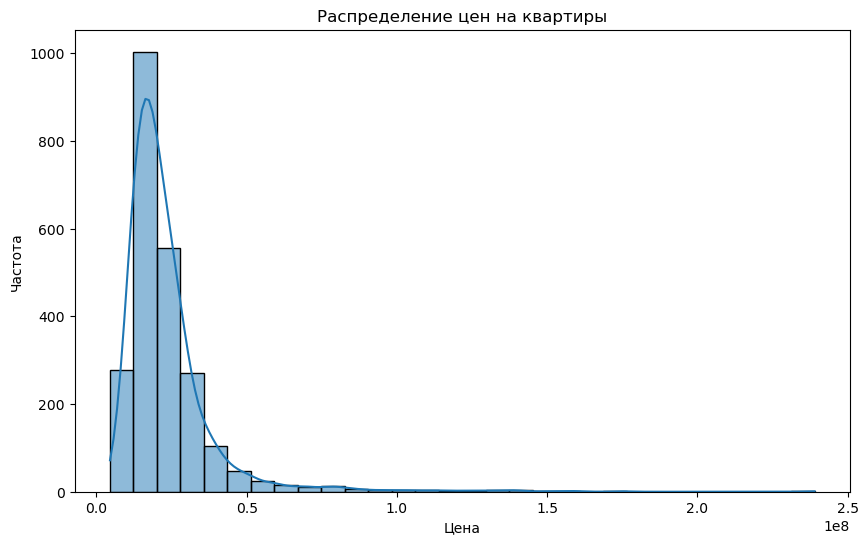

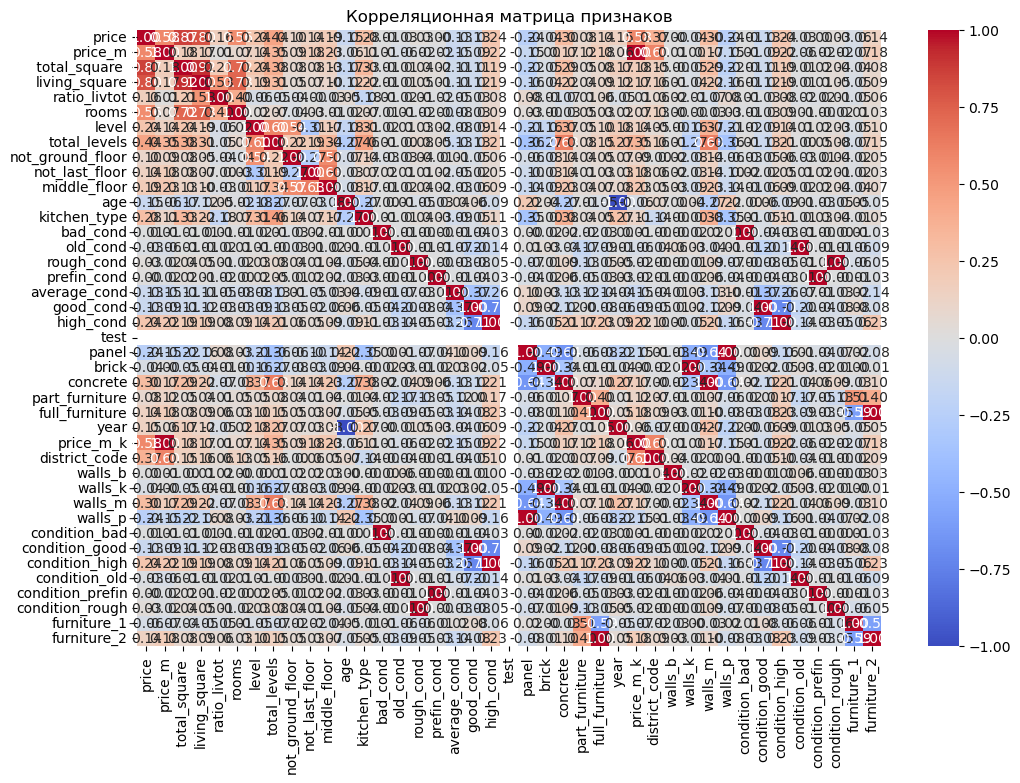

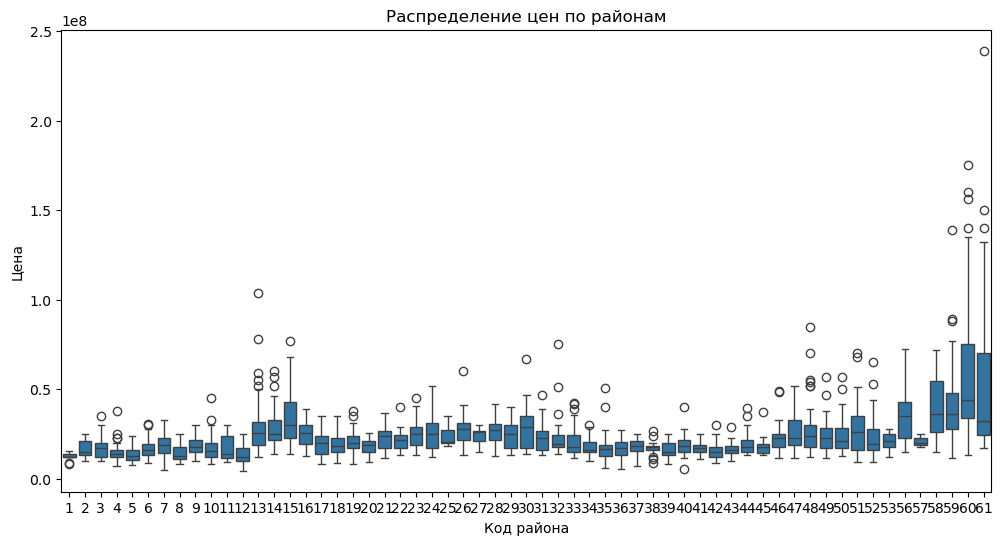

In [13]:
# Распределение цен
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Распределение цен на квартиры")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица признаков")
plt.show()

# Распределение цен по районам
plt.figure(figsize=(12, 6))
sns.boxplot(x='district_code', y='price', data=df)
plt.title("Распределение цен по районам")
plt.xlabel("Код района")
plt.ylabel("Цена")
plt.show()



In [14]:
# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])  # Признаки
y = df['price']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Линейная регрессия
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_rmse

# Случайный лес
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_rmse



2031790.3696388346

In [15]:
# Сравнение моделей
results = pd.DataFrame({
    "Модель": ["Линейная регрессия", "Случайный лес"],
    "RMSE": [lr_rmse, rf_rmse]
})

results


,Модель,RMSE
0,Линейная регрессия,3.388273e+06
1,Случайный лес,2.031790e+06


In [16]:
# Используем лучшую модель для прогнозирования
best_model = rf_model if rf_rmse < lr_rmse else lr_model
future_data = X_test.iloc[:5]  # Пример данных для прогноза
predictions = best_model.predict(future_data)

predictions


array([1.5482e+07, 3.8570e+07, 1.1196e+08, 1.8515e+07, 2.7231e+07])